In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [80]:
def get_data():
    # Data Attributes: is_mobile(boolean), n_products_viewed(integer numeric), visit_duration(numeric), 
    # is_returning_visitor(boolean), time_of_day(categoric: 4 values), user_actions(class)
    df = pd.read_csv("../files/regression/ecommerce_data.csv")
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    # Normalize numerical attributes
    
    X[:,1] = (X[:,1] - X[:,1].mean())/ X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean())/ X[:,2].std()
    
    # One hot encoding of categoric attributes
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    for n in xrange(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
        
    return X2, Y

For logistic regression we consider only two class. Y<=1 and Y>1.

In [81]:
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y<=1]
    Y2 = Y[Y<=1]
    return X2, Y2

In [82]:
X, Y = get_binary_data()

In [83]:
D = X.shape[1]
W = np.random.rand(D)
b = 0

In [84]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [85]:
def forward(X,W,b):
    return sigmoid(X.dot(W)+b)

P(Y/X) = forward(X,W,b)

In [86]:
P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)

In [87]:
def classification_rate(Y,P):
    return np.mean(Y == P)

In [88]:
print("Score: ", classification_rate(Y, predictions))

('Score: ', 0.59798994974874375)


# Trainig weight, Gradient Descent

In [89]:
X,Y = get_binary_data()
X,Y = shuffle(X,Y)

In [90]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

In [91]:
D=X.shape[1]
W = np.random.rand(D)
b=0

## Cross Entropy
The objective function used in logistic regression is Cross Entropy

In [92]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1-T)*np.log(1-pY))

In [93]:
train_cost = []
test_cost = []
learning_rate = 0.001

In [94]:
for i in xrange(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    
    train_cost.append(ctrain)
    test_cost.append(ctest)
    
    W -= learning_rate*Xtrain.T.dot(pYtrain-Ytrain)
    b -= learning_rate*(pYtrain-Ytrain).sum()
    
    if i % 1000 == 0:
        print i, ctrain, ctest
    
print "Final training classification rate: ", classification_rate(Ytrain, np.round(pYtrain))
print "Final testing classification rate: ", classification_rate(Ytest, np.round(pYtest))

0 0.744534868076 0.765460941646
1000 0.179085854434 0.203599288938
2000 0.177918408364 0.200903751171
3000 0.177823690806 0.200460603636
4000 0.17781413864 0.200351824657
5000 0.17781311493 0.200319645979
6000 0.177813003096 0.200309395141
7000 0.177812990802 0.200306040435
8000 0.177812989448 0.200304932102
9000 0.177812989299 0.200304564715
Final training classification rate:  0.976510067114
Final testing classification rate:  0.96


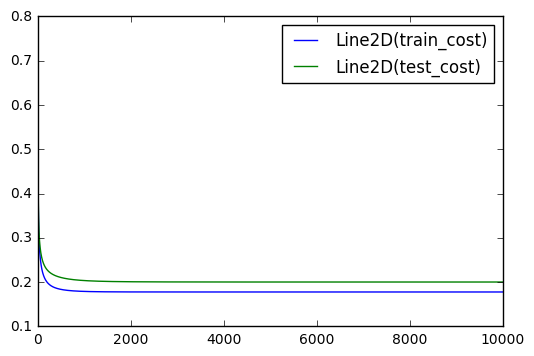

In [95]:
legend1, = plt.plot(train_cost, label = 'train_cost')
legend2, = plt.plot(test_cost, label = "test_cost")
plt.legend([legend1, legend2])
plt.show()

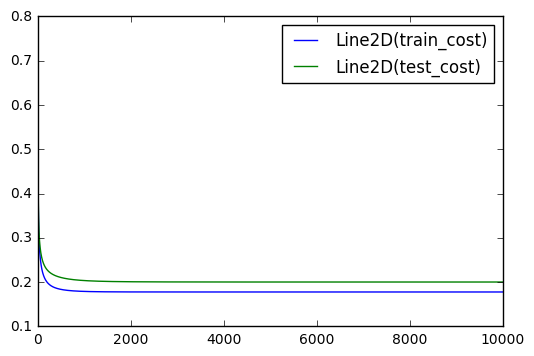

In [109]:
legend1, = plt.plot(train_cost, label = 'train_cost')
legend2, = plt.plot(test_cost, label = "test_cost")
plt.legend([legend1, legend2])
plt.show()